<a href="https://colab.research.google.com/github/Naresh2308/Facial_Expression_Detection/blob/main/Face_expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [254]:
!pip install kaggle

In [255]:
!kaggle datasets download -d apollo2506/facial-recognition-dataset --unzip -p /content/dataset


Dataset URL: https://www.kaggle.com/datasets/apollo2506/facial-recognition-dataset
License(s): CC0-1.0
 60% 36.0M/59.7M [00:00<00:00, 190MB/s] 
100% 59.7M/59.7M [00:00<00:00, 205MB/s]


In [256]:
!ls /content/dataset

Testing  Training


In [257]:
import os

dataset_dir = '/content/dataset'
image_files = [f for f in os.listdir(dataset_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

print(f"Found {len(image_files)} image files.")

Found 0 image files.


In [258]:
!mv /content/dataset/Testing/Testing/* /content/dataset/Testing/
!rm -r /content/dataset/Testing/Testing

mv: cannot move '/content/dataset/Testing/Testing/Angry' to '/content/dataset/Testing/Angry': Directory not empty
mv: cannot move '/content/dataset/Testing/Testing/Fear' to '/content/dataset/Testing/Fear': Directory not empty
mv: cannot move '/content/dataset/Testing/Testing/Happy' to '/content/dataset/Testing/Happy': Directory not empty
mv: cannot move '/content/dataset/Testing/Testing/Neutral' to '/content/dataset/Testing/Neutral': Directory not empty
mv: cannot move '/content/dataset/Testing/Testing/Sad' to '/content/dataset/Testing/Sad': Directory not empty
mv: cannot move '/content/dataset/Testing/Testing/Suprise' to '/content/dataset/Testing/Suprise': Directory not empty


Class: Fear


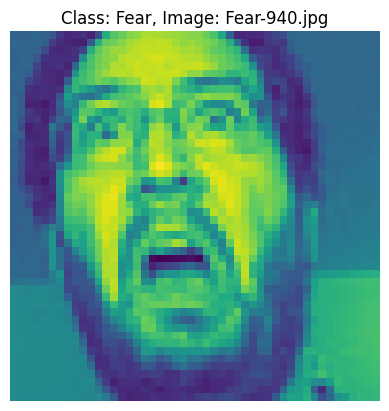

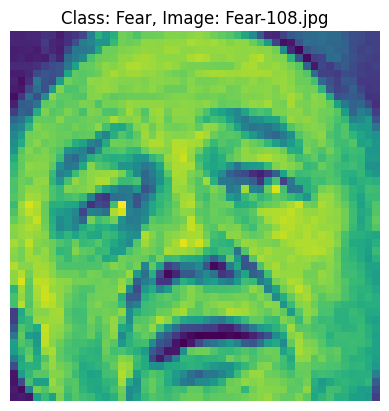

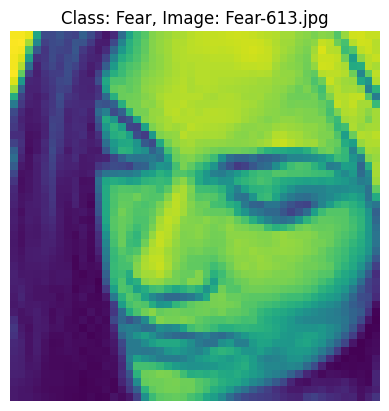

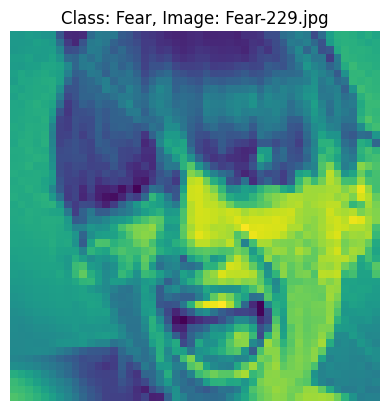

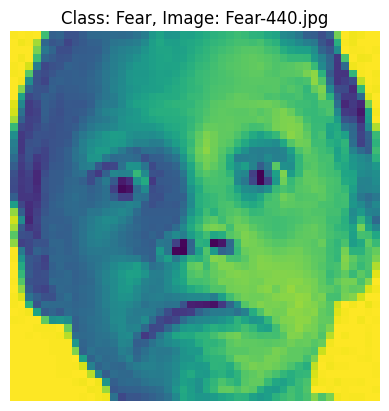

Class: Neutral


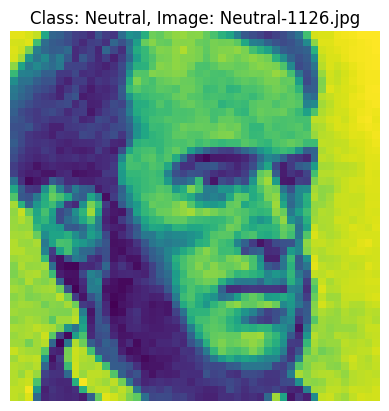

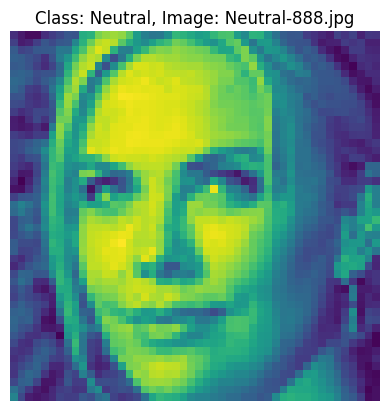

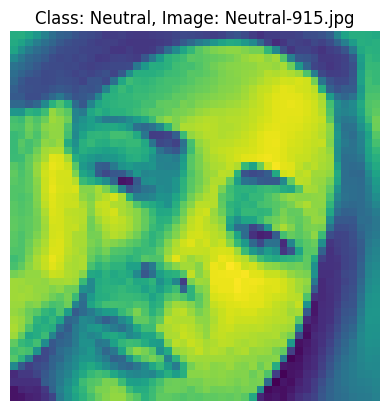

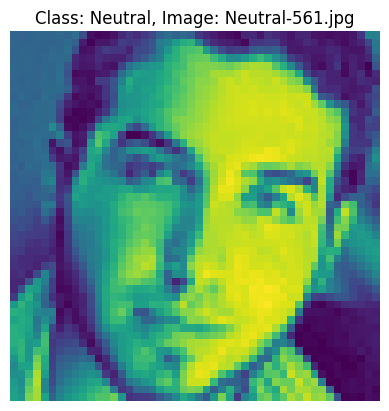

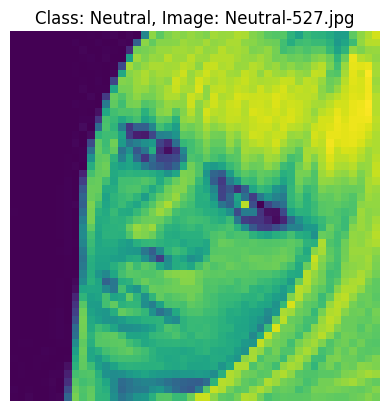

Class: Suprise


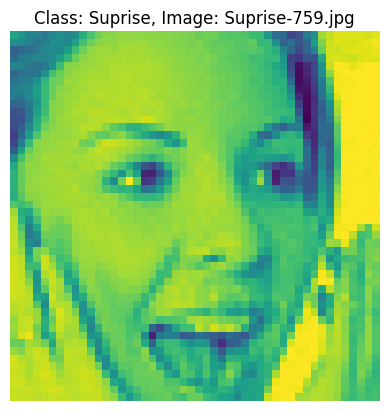

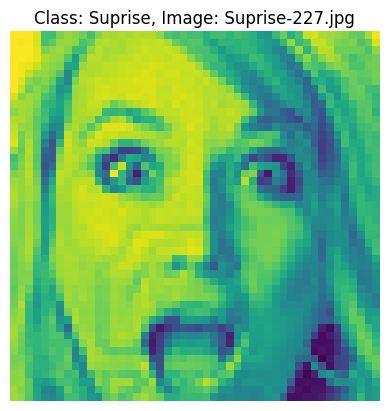

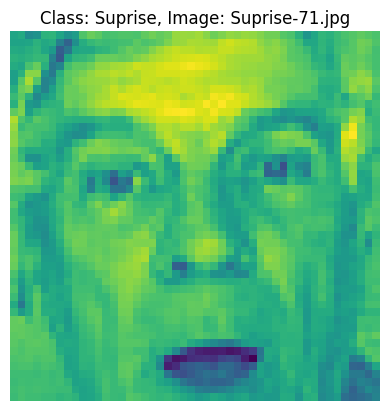

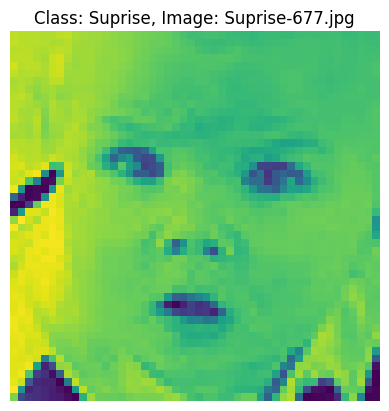

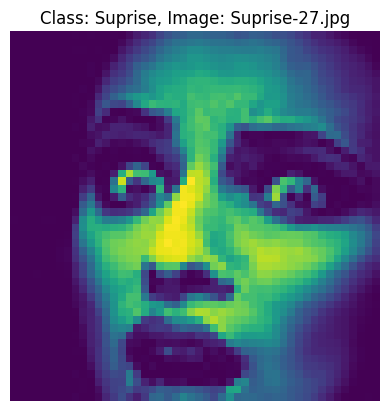

Class: Sad


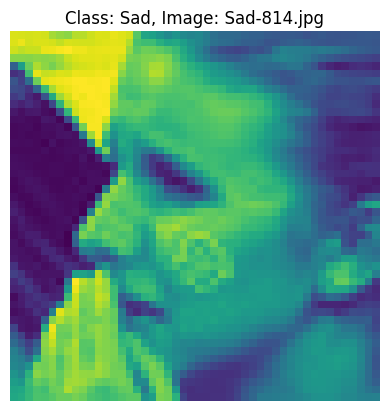

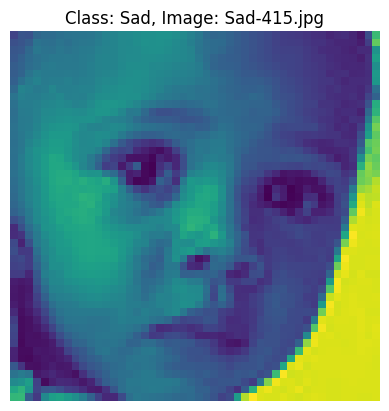

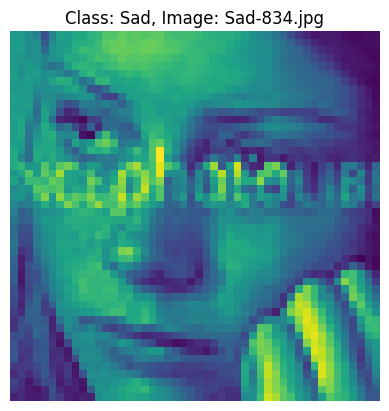

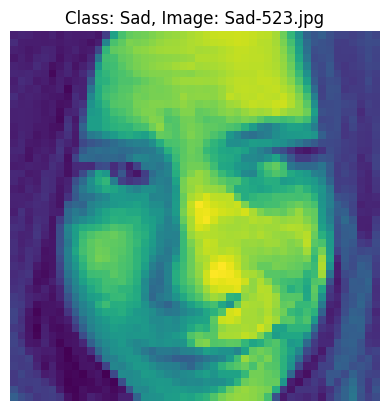

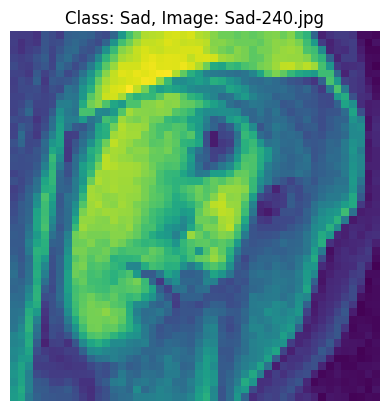

Class: Happy


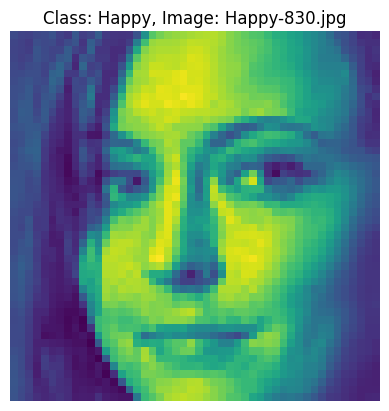

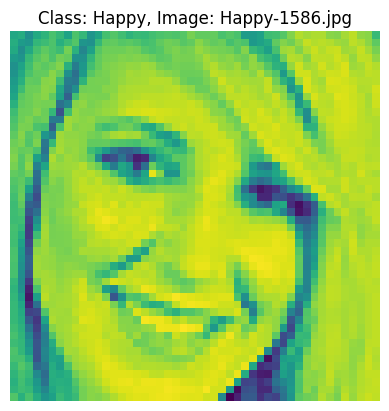

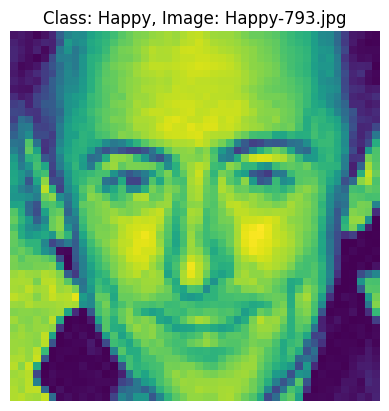

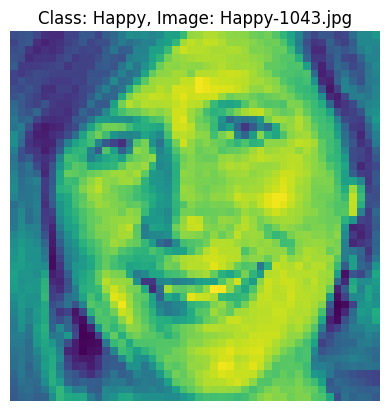

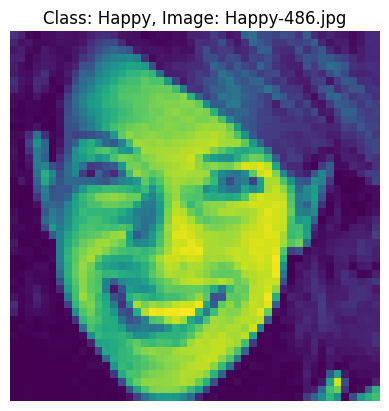

Class: Angry


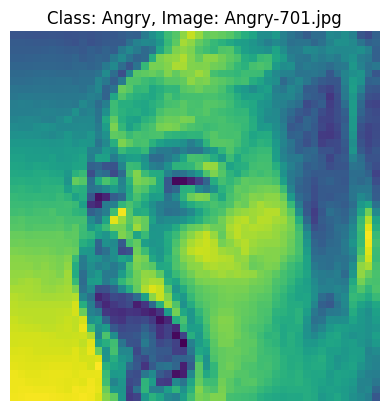

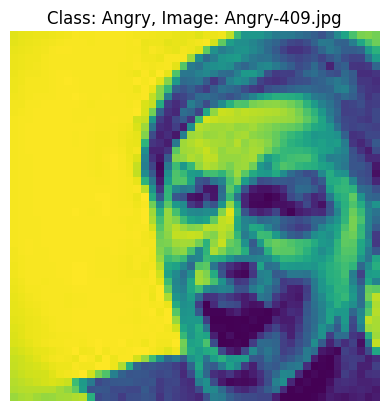

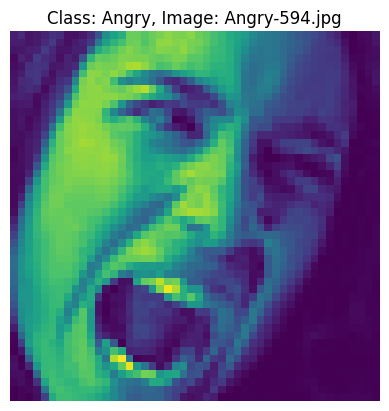

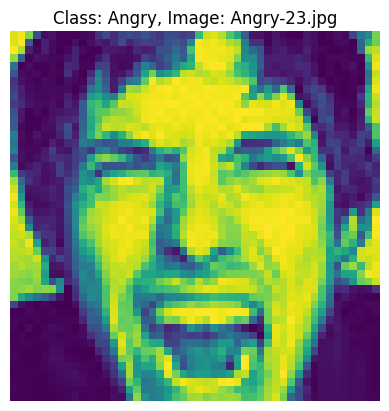

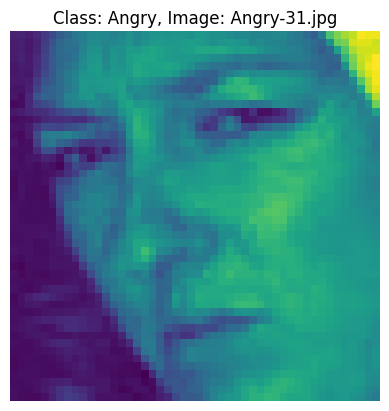

In [259]:
from PIL import Image, UnidentifiedImageError
import matplotlib.pyplot as plt
import os

# Define the updated Testing directory
testing_dir = '/content/dataset/Testing'

# Check if the Testing directory exists
if not os.path.exists(testing_dir):
    print(f"Directory not found: {testing_dir}")
else:
    # Loop through each class folder in the Testing directory
    for class_name in os.listdir(testing_dir):
        class_path = os.path.join(testing_dir, class_name)

        # Ensure the path is a directory (class folder)
        if os.path.isdir(class_path):
            print(f"Class: {class_name}")

            # Display the first 5 images in the class folder
            for image_name in os.listdir(class_path)[:5]:
                image_path = os.path.join(class_path, image_name)

                # Attempt to open and display the image
                try:
                    with Image.open(image_path) as image:
                        plt.figure()
                        plt.imshow(image)
                        plt.title(f"Class: {class_name}, Image: {image_name}")
                        plt.axis('off')
                        plt.show()
                except UnidentifiedImageError:
                    print(f"File {image_name} is not a valid image.")
                except Exception as e:
                    print(f"Error loading {image_name}: {e}")
        else:
            print(f"Skipping non-directory file: {class_name}")



In [260]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical, load_img # Import load_img from tensorflow.keras.utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization
import os
import pandas as pd
import numpy as np

In [261]:
!mv /content/dataset/Training/Training/* /content/dataset/Training/
!rm -r /content/dataset/Training/Training

mv: cannot move '/content/dataset/Training/Training/Angry' to '/content/dataset/Training/Angry': Directory not empty
mv: cannot move '/content/dataset/Training/Training/Fear' to '/content/dataset/Training/Fear': Directory not empty
mv: cannot move '/content/dataset/Training/Training/Happy' to '/content/dataset/Training/Happy': Directory not empty
mv: cannot move '/content/dataset/Training/Training/Neutral' to '/content/dataset/Training/Neutral': Directory not empty
mv: cannot move '/content/dataset/Training/Training/Sad' to '/content/dataset/Training/Sad': Directory not empty
mv: cannot move '/content/dataset/Training/Training/Suprise' to '/content/dataset/Training/Suprise': Directory not empty


In [262]:
TRAIN_DIR = '/content/dataset/Training'
TEST_DIR = '/content/dataset/Testing'

In [263]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [264]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

Fear completed
Neutral completed
Suprise completed
Sad completed
Happy completed
Angry completed


In [265]:
print(train)

                                                image  label
0        /content/dataset/Training/Fear/Fear-3777.jpg   Fear
1        /content/dataset/Training/Fear/Fear-2020.jpg   Fear
2        /content/dataset/Training/Fear/Fear-2990.jpg   Fear
3        /content/dataset/Training/Fear/Fear-1198.jpg   Fear
4        /content/dataset/Training/Fear/Fear-3468.jpg   Fear
...                                               ...    ...
28268  /content/dataset/Training/Angry/Angry-1721.jpg  Angry
28269   /content/dataset/Training/Angry/Angry-795.jpg  Angry
28270  /content/dataset/Training/Angry/Angry-3448.jpg  Angry
28271    /content/dataset/Training/Angry/Angry-79.jpg  Angry
28272   /content/dataset/Training/Angry/Angry-811.jpg  Angry

[28273 rows x 2 columns]


In [266]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

Fear completed
Neutral completed
Suprise completed
Sad completed
Happy completed
Angry completed


In [267]:
print(test)
print(test['image'])

                                             image  label
0       /content/dataset/Testing/Fear/Fear-940.jpg   Fear
1       /content/dataset/Testing/Fear/Fear-108.jpg   Fear
2       /content/dataset/Testing/Fear/Fear-613.jpg   Fear
3       /content/dataset/Testing/Fear/Fear-229.jpg   Fear
4       /content/dataset/Testing/Fear/Fear-440.jpg   Fear
...                                            ...    ...
7062   /content/dataset/Testing/Angry/Angry-98.jpg  Angry
7063  /content/dataset/Testing/Angry/Angry-157.jpg  Angry
7064  /content/dataset/Testing/Angry/Angry-795.jpg  Angry
7065   /content/dataset/Testing/Angry/Angry-79.jpg  Angry
7066  /content/dataset/Testing/Angry/Angry-811.jpg  Angry

[7067 rows x 2 columns]
0         /content/dataset/Testing/Fear/Fear-940.jpg
1         /content/dataset/Testing/Fear/Fear-108.jpg
2         /content/dataset/Testing/Fear/Fear-613.jpg
3         /content/dataset/Testing/Fear/Fear-229.jpg
4         /content/dataset/Testing/Fear/Fear-440.jpg
              

In [268]:
from tqdm.notebook import tqdm

In [269]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,color_mode= 'grayscale')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features


In [270]:
train_features = extract_features(train['image'])

  0%|          | 0/28273 [00:00<?, ?it/s]

In [271]:
test_features = extract_features(test['image'])

  0%|          | 0/7067 [00:00<?, ?it/s]

In [272]:
x_train = train_features/255.0
x_test = test_features/255.0

In [273]:
from sklearn.preprocessing import LabelEncoder

In [274]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [275]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [276]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [277]:
# model = Sequential()


# model.add(Conv2D(64,(3,3), padding='same',activation='relu', input_shape=(48, 48,1)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# # 2nd Convolution layer
# model.add(Conv2D(128,(5,5),activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# # 3rd Convolution layer
# model.add(Conv2D(512,(3,3),activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# # 4th Convolution layer
# model.add(Conv2D(512,(3,3),activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(64,(3,3), padding='same',activation='relu', input_shape=(48, 48,1)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# # 2nd Convolution layer
# model.add(Conv2D(128,(5,5),activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# # 3rd Convolution layer
# model.add(Conv2D(512,(3,3),activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# # 4th Convolution layer
# model.add(Conv2D(512,(3,3),activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))


# # Flattening
# model.add(Flatten())

# model.add(Dense(256,activation='relu'))
# model.add(Dropout(0.25))

# # Fully connected layer 2nd layer
# model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.25))

# model.add(Dense(7, activation='softmax'))


# # convolutional layers
# model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.2))

# model.add(Conv2D(256, kernel_size=(3,3), activation='relu',))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.3))

# model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.4))


# model.add(Flatten())
# # fully connected layers
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.3))

# # output layer
# model.add(Dense(7, activation='softmax'))


In [278]:
model = Sequential()


model.add(Conv2D(64,(3,3), padding='same',activation='relu', input_shape=(48, 48,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [279]:
datagen = ImageDataGenerator(
    rotation_range=20,  # Rotate images by up to 20 degrees
    width_shift_range=0.2,  # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2,  # Shift images vertically by up to 20% of the height
    shear_range=0.2,  # Apply shear transformations
    zoom_range=0.2,  # Zoom in/out on images
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'  # Fill any empty pixels with nearest neighbor values
)

datagen.fit(x_train)

In [280]:
# model = Sequential()

# model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(48, 48, 1),kernel_regularizer=regularizers.l2(0.01)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=regularizers.l1(0.01)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(7, activation='softmax'))

In [281]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [282]:
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)                   │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_56 (MaxPooling2D)      │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_76 (Dropout)                 │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_61 (Conv2D)                   │ (None, 24, 24, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_57 (MaxPooling2D)      │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_77 (Dropout)                 │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_62 (Conv2D)                   │ (None, 12, 12, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_58 (MaxPooling2D)      │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_78 (Dropout)                 │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_63 (Conv2D)                   │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_59 (MaxPooling2D)      │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_79 (Dropout)                 │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_80 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_81 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,470,791 (17.05 MB)

 Trainable params: 4,470,791 (17.05 MB)

 Non-trainable params: 0 (0.00 B)

In [283]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(x=x_train, y=y_train, batch_size=64, epochs=50,
          validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.2466 - loss: 1.7869 - val_accuracy: 0.2481 - val_loss: 1.7463
Epoch 2/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 33s 29ms/step - accuracy: 0.2545 - loss: 1.7410 - val_accuracy: 0.3324 - val_loss: 1.6173
Epoch 3/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.3407 - loss: 1.6058 - val_accuracy: 0.4074 - val_loss: 1.4942
Epoch 4/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.3942 - loss: 1.5146 - val_accuracy: 0.4319 - val_loss: 1.4108
Epoch 5/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.4205 - loss: 1.4462 - val_accuracy: 0.4705 - val_loss: 1.3292
Epoch 6/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.4544 - loss: 1.3721 - val_accuracy: 0.4844 - val_loss: 1.3065
Epoch 7/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.4703 - loss: 1.3302 - val_accuracy: 0.5091 - val_loss: 1.2485
Epoch 8/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.4936 - loss: 1.2782 - 

In [284]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [285]:
from keras.models import model_from_json

In [286]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [287]:
label = ['angry','fear','happy','neutral','sad','surprise']

In [288]:
def ef(image):
    img = load_img(image,color_mode='grayscale' )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0


In [289]:
image = '/content/dataset/Testing/Suprise/Suprise-100.jpg'
# print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
model prediction is  surprise


In [290]:
import matplotlib.pyplot as plt
%matplotlib inline

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
model prediction is  fear


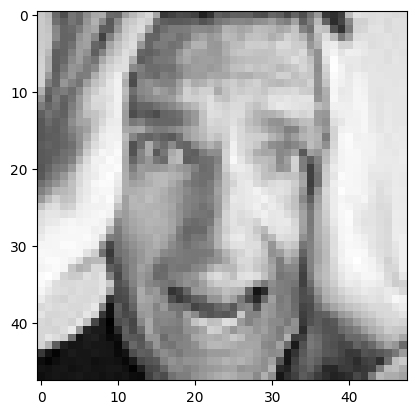

In [306]:
image = '/content/dataset/Testing/Fear/Fear-1001.jpg'
# print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


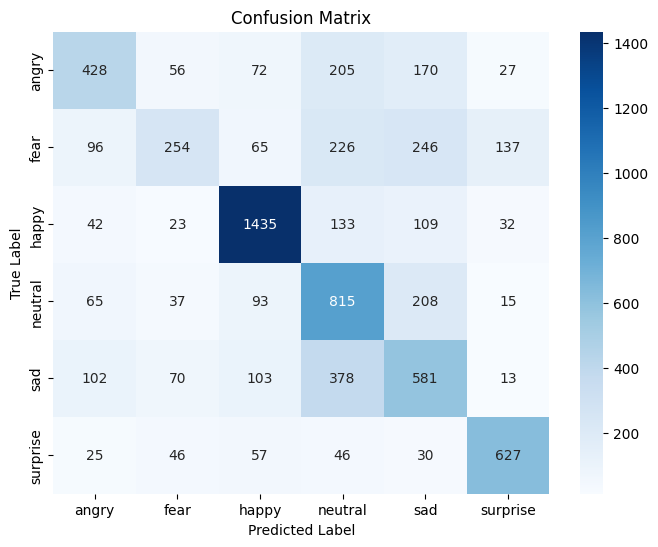

In [292]:
# 1. Import necessary libraries
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Predict on the test set
y_pred = model.predict(x_test)

# 3. Get predicted labels (numerical format)
y_pred_classes = np.argmax(y_pred, axis=1)

# 4. Get true labels (numerical format)
y_true_classes = np.argmax(y_test, axis=1)

# 5. Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# 6. Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label, yticklabels=label)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()